<a href="https://colab.research.google.com/github/kebabee/ML-assiociative-memory/blob/main/gradient_patterns_associative_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing and generating data (irrelevant)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import zipfile
from io import BytesIO
from PIL import Image
import random
import tensorflow as tf

response = requests.get("https://raw.githubusercontent.com/kebabee/ML-assiociative-memory/bfa215afd00124cf2c32b26aea42381588e75982/hopfield_header.py")

if response.status_code == 200:
    with open('hopfield_header.py', 'wb') as f:
        f.write(response.content)
    print("hopfield_header.py downloaded successfully.")
else:
    print("Failed to download hopfield_header.py.")

import hopfield_header as hopf

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
unique_labels = np.unique(train_labels)

test0 = []
test1 = []
test2 = []
test3 = []
test4 = []
test5 = []
test6 = []
test7 = []
test8 = []
test9 = []
valid1 = []
train1 = []
target_images = []

for i in range(4065):
  temp = []
  for label in unique_labels:
    label_indices = np.where(train_labels == label)[0]
    selected_image = train_images[label_indices[i]]
    selected_image = selected_image.reshape(-1)  #reshape macierzy na wektor
    temp.append(selected_image)
  train1.append(temp)

for i in range(4065):
    temp = []
    for label in unique_labels:
        label_indices = np.where(train_labels == label)[0]
        selected_image = train_images[label_indices[i]]
        selected_image = selected_image.reshape(-1)
        temp.append(selected_image)
    test0.append(temp[0])
    test1.append(temp[1])
    test2.append(temp[2])
    test3.append(temp[3])
    test4.append(temp[4])
    test5.append(temp[5])
    test6.append(temp[6])
    test7.append(temp[7])
    test8.append(temp[8])
    test9.append(temp[9])

for i in range(4065,5420):
  temp = []
  for label in unique_labels:
    label_indices = np.where(train_labels == label)[0]
    selected_image = train_images[label_indices[i]]
    selected_image = selected_image.reshape(-1)
    temp.append(selected_image)
  valid1.append(temp)

images = test0

def adagrad_loop(iterations, images, learning_rate=4, epsilon=1e-8):
    target_image = np.random.randint(0, 128, size=784)
    G = np.zeros_like(target_image, dtype=np.float64)

    for j in range(iterations+1):
        subset_indices = np.random.choice(len(images), size=subset_size, replace=False)
        subset_images = [images[i] for i in subset_indices]

        gradient = np.zeros_like(target_image, dtype=np.float64)

        for image in subset_images:
            gradient += 2 * (np.array(image) - target_image) / (5420 * 768)

        G += gradient**2

        target_image = target_image + (learning_rate / (np.sqrt(G) + epsilon)) * gradient
        target_image = np.clip(target_image, 0, 255)

    target_images.append(target_image)

learning_rate = 0.000005
subset_size = int(0.1 * len(images))

adagrad_loop(311, test0)
adagrad_loop(602, test1)
adagrad_loop(1460, test2)
adagrad_loop(1948, test3)
adagrad_loop(1907, test4)
adagrad_loop(1343, test5)
adagrad_loop(1721, test6)
adagrad_loop(1376, test7)
adagrad_loop(1857, test8)
adagrad_loop(1549, test9)

hopfield_header.py downloaded successfully.
11490434/11490434 [==============================] - 0s 0us/step


# Classification by average digit pattern

Concept: What would happen if we generate digit images most similar to training expamples and let associative memory classify test examples?

Generating most similar digit can be made by minimizing objective function, here:
$$J(pixels) = \sum_{exaples} \; \sum_{pixels} (example\;pixel\;value - pattern\;pixel\;value)^2$$
in more math way:
$$J(\theta) = \sum_{exaples} \; \sum_{i}^N (example\;pixel\;value - \theta_i)^2$$
Gradient of *J* equals:
$$\nabla_\theta J(\theta) = \sum_{exaples} \; \sum_{i}^N 2 (example\;pixel\;value - \theta_i)$$

Minimizing these kind of functions can be performed by various gradient algorithms, in this case 10 digit patterns generated by using Adagrad looks like this:

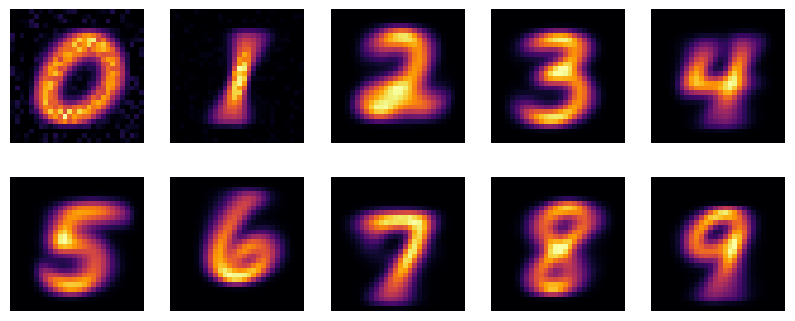

In [2]:
fig, axes = plt.subplots(2, 5, figsize=(10,4))
for i in range(10):
  row, col = i // 5, i % 5
  axes[row, col].imshow(target_images[i].reshape(28, 28), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

These are simply most common images to every other in training dataset (4065 images for every digit).

The accuracy of clasification by minimizing energy to generated patterns:

In [7]:
network1 = hopf.hopfield_net(784)
network1.set_patterns(target_images)
beta = 10.0
numOfTest = 0
score = 0

for i in range(len(valid1)):
  for j in range(10):
    result, index = network1.hopfield_layer(valid1[i][j], beta)
    numOfTest += 1
    if index == j:
      score += 1

print(f"Accuracy for test dataset: {score/numOfTest * 100:.2f}%")

Accuracy for test dataset: 62.60%


In [9]:
numOfTest = 0
score = 0

for i in range(len(train1)):
  for j in range(10):
    result, index = network1.hopfield_layer(train1[i][j], beta)
    numOfTest += 1
    if index == j:
      score += 1

print(f"Accuracy for train dataset with beta = {beta}: {score/numOfTest * 100:.2f}%")

Accuracy for train dataset with beta = 10.0: 62.62%


Few result examples:

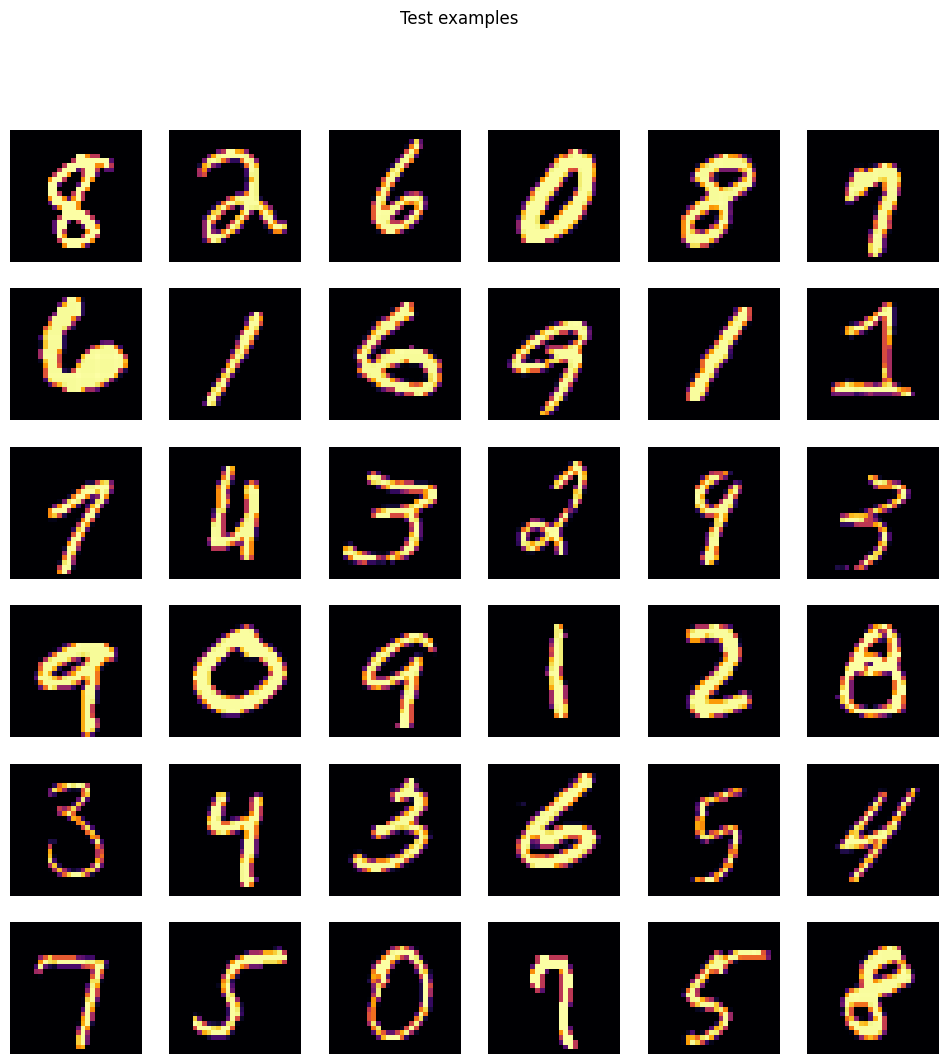

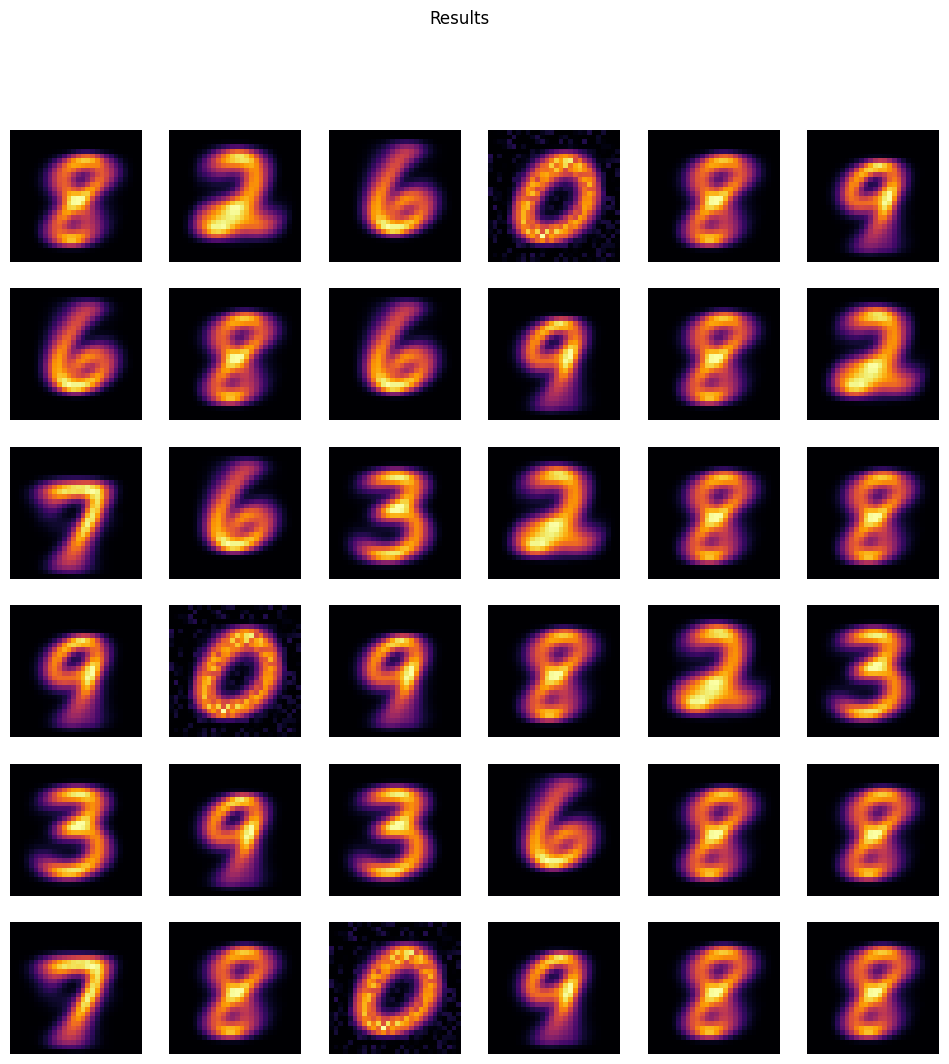

In [11]:
valid = []

for _ in range(4):
  for label in unique_labels:
      label_indices = np.where(train_labels == label)[0]
      selected_image = train_images[label_indices[random.randint(0,5420)]]
      selected_image = selected_image.reshape(-1)  #reshape macierzy na wektor
      valid.append(selected_image)

random.shuffle(valid)

fig, axes = plt.subplots(6, 6, figsize=(12,12))
for i in range(36):
    row, col = i // 6, i % 6  # Oblicz indeksy rzędu i kolumny
    axes[row, col].imshow(valid[i].reshape(28, 28), cmap="inferno")
    axes[row, col].axis('off')  # Wyłącz podpisy osi
plt.suptitle("Test examples")
plt.show()

fig, axes = plt.subplots(6, 6, figsize=(12,12))
for i in range(36):
    result, index = network1.hopfield_layer(valid[i], beta)
    row, col = i // 6, i % 6
    axes[row, col].imshow(result.reshape(28, 28), cmap="inferno")
    axes[row, col].axis('off')
plt.suptitle("Results")
plt.show()